In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Load the dataset

In [87]:
# Load the dataset
data = pd.read_csv('student_data.csv')

# Data preprocessing

In [88]:
# Rename columns
data = data.rename(columns={'school': 'School', 'sex':'Sex', 'age':'Age',
                   'address':'HomeLoc','famsize':'FamSize', 'reason':'Reason', 
                    'guardian': 'Guardian','traveltime':'TravelTime','studytime':'StudyTime',
                  'failures':'Failures','schoolsup':'SchoolSup','famsup':'FamSup','paid':'Paid',
                  'activities':'Activities','nursery':'Nursery','higher':'Higher',
                   'internet':'Internet','romantic':'Romantic','famrel':'FamRel',
                   'freetime':'FreeTime','goout':'GoOut','health':'Health','absences':'Absences'})

In [89]:
# Check for null values
data.isna().sum()

School        0
Sex           0
Age           0
HomeLoc       0
FamSize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
Reason        0
Guardian      0
TravelTime    0
StudyTime     0
Failures      0
SchoolSup     0
FamSup        0
Paid          0
Activities    0
Nursery       0
Higher        0
Internet      0
Romantic      0
FamRel        0
FreeTime      0
GoOut         0
Dalc          0
Walc          0
Health        0
Absences      0
G1            0
G2            0
G3            0
dtype: int64

In [90]:
# Check for duplicates
data.loc[data.duplicated()]

,School,Sex,Age,HomeLoc,FamSize,Pstatus,Medu,Fedu,Mjob,Fjob,...,FamRel,FreeTime,GoOut,Dalc,Walc,Health,Absences,G1,G2,G3


In [91]:
# Drop duplicate rows
data = data.drop_duplicates()


# Exploratory Data Analysis (EDA) Functions

In [92]:
def plot_distributions(df):
    """
    Plots distribution of all numerical and categorical features in the dataset.
    
    Args:
    df (DataFrame): The input dataframe for analysis.
    """
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = df.select_dtypes(include=['category', 'object', 'int64']).columns
    
    # Plot numerical features
    for feature in numerical_features:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[feature], kde=True, color='blue')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()
    
    # Plot categorical features
    for feature in categorical_features:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=feature, palette='viridis')
        plt.title(f'Countplot of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show()


def plot_heatmap(df):
    """
    Plots a heatmap of the correlation matrix of numerical features in the dataset.
    
    Args:
    df (DataFrame): The input dataframe for analysis.
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
    plt.title('Heatmap of Correlation Matrix')
    plt.show()



def plot_feature_importance(df, target_column):
    """
    Plots the feature importance of the dataset using a Random Forest classifier.
    
    Args:
    df (DataFrame): The input dataframe for analysis.
    target_column (str): The name of the target column.
    """
    # Preprocess the data
    label_encoder = LabelEncoder()
    df[target_column] = label_encoder.fit_transform(df[target_column])
    X = df.drop(columns=[target_column])
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Fit RandomForestClassifier to find feature importance
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    feature_importances_sorted = feature_importances.sort_values(ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances_sorted, y=feature_importances_sorted.index, palette='viridis')
    plt.title('Feature Importance based on RandomForest')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()


def plot_correlation_matrix(df):
    """
    Plots the correlation matrix for all numerical features in the dataset.
    
    Args:
    df (DataFrame): The input dataframe for analysis.
    """
    plt.figure(figsize=(12, 8))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()


In [93]:
def plot_feature_importance(df, target_column):
    """
    Plots the feature importance of the dataset using a Random Forest classifier.
    
    Args:
    df (DataFrame): The input dataframe for analysis.
    target_column (str): The name of the target column.
    """
    # Preprocess the data
    label_encoder = LabelEncoder()
    if df[target_column].dtype == 'object':
        df[target_column] = label_encoder.fit_transform(df[target_column])
    X = df.drop(columns=[target_column])
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Fit RandomForestClassifier to find feature importance
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    feature_importances_sorted = feature_importances.sort_values(ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances_sorted, y=feature_importances_sorted.index, palette='viridis')
    plt.title('Feature Importance based on RandomForest')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()


def plot_heatmap_matplotlib(df):
    """
    Plots a heatmap of the correlation matrix of numerical features in the dataset using matplotlib.
    
    Args:
    df (DataFrame): The input dataframe for analysis.
    """
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(12, 8))
    cax = ax.matshow(corr, cmap='coolwarm')
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title('Heatmap of Correlation Matrix (Matplotlib)', pad=20)
    plt.show()


def plot_correlation_matrix_matplotlib(df):
    """
    Plots the correlation matrix for all numerical features in the dataset using matplotlib.
    
    Args:
    df (DataFrame): The input dataframe for analysis.
    """
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(12, 8))
    cax = ax.matshow(corr, cmap='coolwarm')
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title('Correlation Matrix of Numerical Features (Matplotlib)', pad=20)
    plt.show()


In [94]:
cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']
num_features = [feature for feature in data.columns if data[feature].dtype != 'O']
data["Avg_score"] = (data["G1"]+data["G2"]+data["G3"])/3
data.sum
num_features
for col in ["G1", "G2", "G3"]:
    num_features.remove(col)


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 数据拆分
y = data["Avg_score"]
X = data.drop(["Avg_score","G1","G2","G3"], axis= 1)
X


,School,Sex,Age,HomeLoc,FamSize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Higher,Internet,Romantic,FamRel,FreeTime,GoOut,Dalc,Walc,Health,Absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,no,5,5,4,4,5,4,11
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,3
392,MS,M,21,R,GT3,T,1,1,other,other,...,yes,no,no,5,5,3,3,3,3,3
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,yes,no,4,4,1,3,4,5,0


In [96]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

X = preprocessor.fit_transform(X)

In [97]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# # Convert non-numeric features to numeric
# non_numeric_features = X.select_dtypes(include=['object']).columns
# label_encoder = LabelEncoder()
# for feature in non_numeric_features:
#     X[feature] = label_encoder.fit_transform(data[feature])

In [99]:
model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [100]:
# 对测试集进行预测
y_pred = model.predict(X_test)
y_pred


array([ 3.26953125,  8.26953125,  9.21484375, 10.95703125, 10.33203125,
       10.23046875, 13.38671875, 12.24609375, 10.43359375, 12.80078125,
       12.70703125, 10.42578125, 11.4296875 , 13.5390625 , 10.6953125 ,
       10.7109375 , 10.43359375,  9.58203125, 11.828125  , 10.34765625,
       11.08203125, 12.96484375, 12.76953125, 10.640625  , 10.77734375,
       13.21484375, 12.578125  , 13.7421875 , 13.66796875, 13.79296875,
        9.55078125, 10.9140625 , 13.69140625,  9.51171875, 10.45703125,
       10.41796875,  6.65234375, 10.73828125, 11.39453125,  7.7109375 ,
        4.07421875, 10.5859375 , 11.5       ,  8.69140625, 10.6875    ,
       10.140625  , 10.42578125,  9.18359375, 10.92578125, 13.8203125 ,
        8.91796875, 13.3984375 , 14.48046875, 12.203125  ,  9.17578125,
        8.34375   , 12.30859375,  8.828125  , 13.37109375, 13.35546875,
       14.09375   , 11.75      ,  1.34765625, 11.703125  ,  9.01953125,
       10.265625  ,  9.16015625, 11.57421875,  9.72265625, 14.34

In [101]:
# 评估
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 11.38
R² Score: 0.23


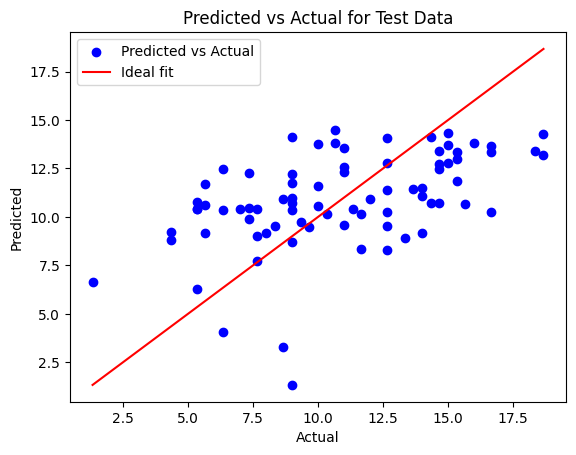

In [102]:
import matplotlib.pyplot as plt

# 可视化预测值 vs 实际值
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Ideal fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.title('Predicted vs Actual for Test Data')
plt.show()


# Main part

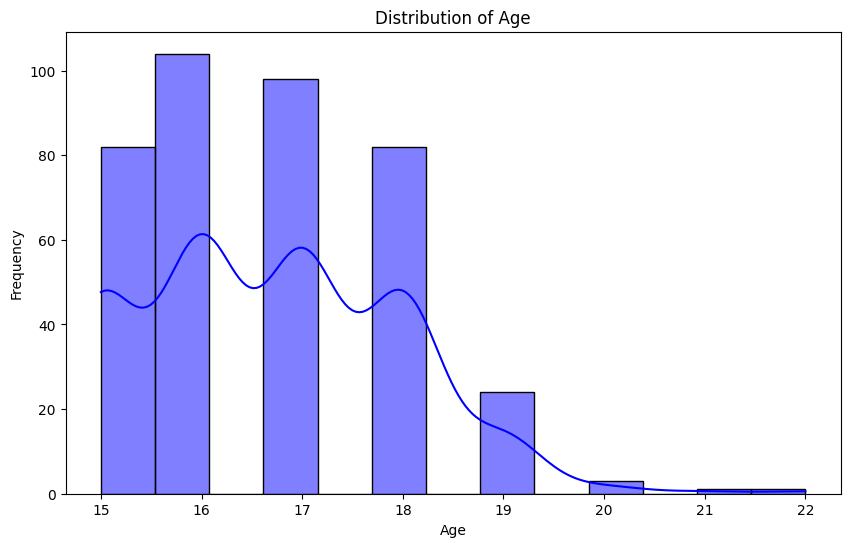

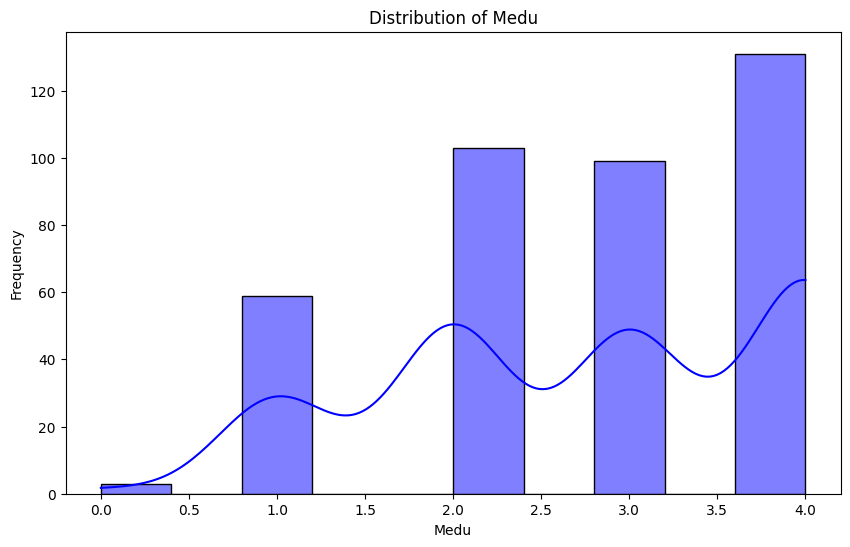

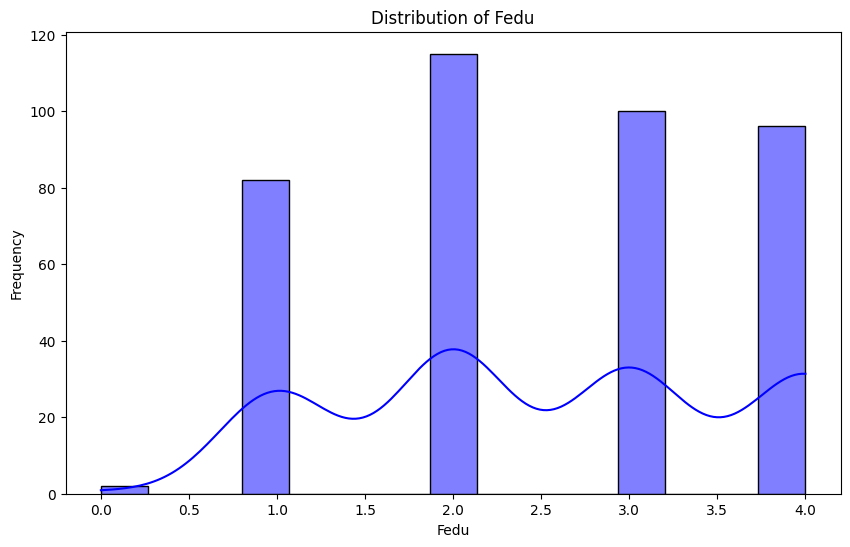

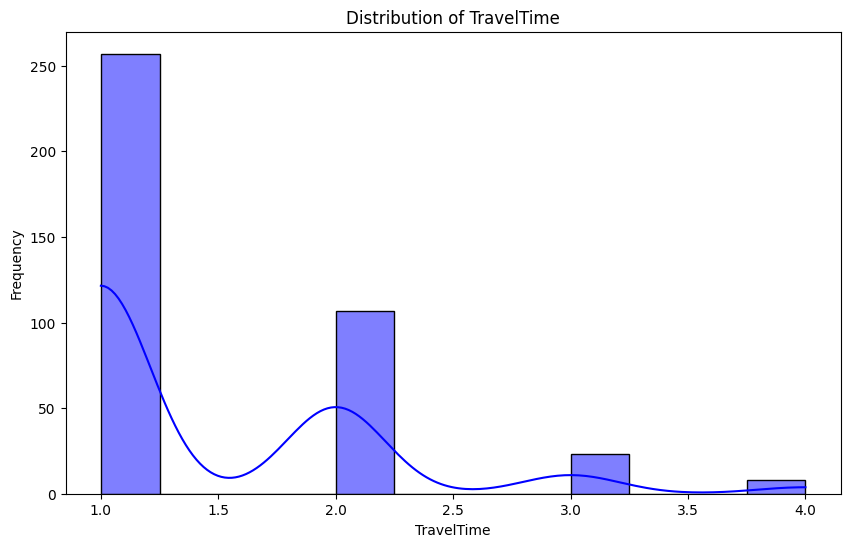

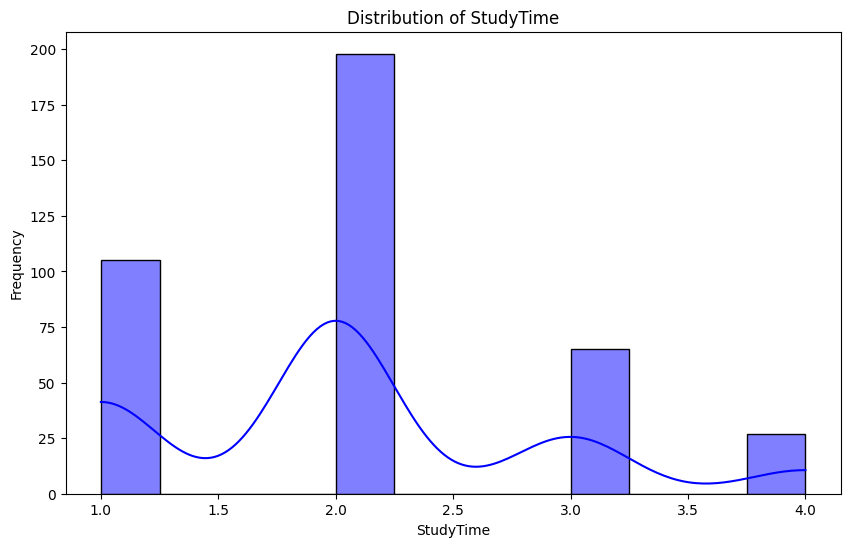

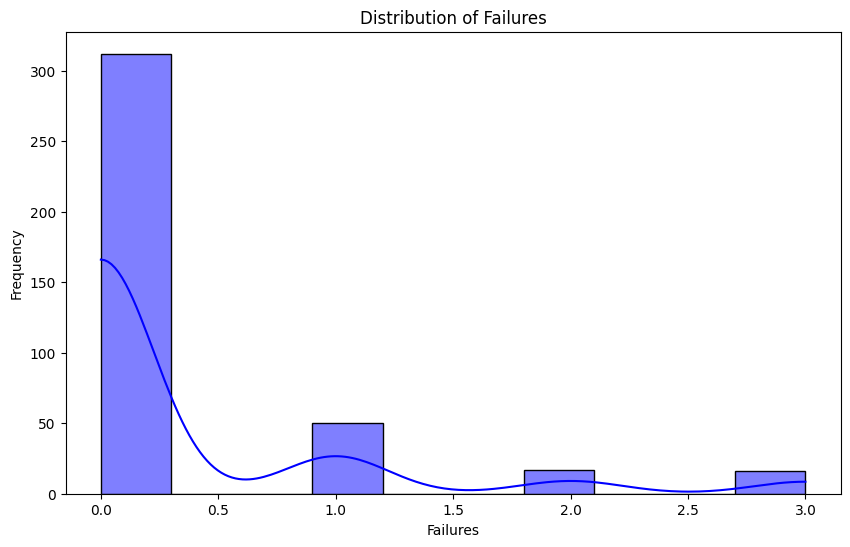

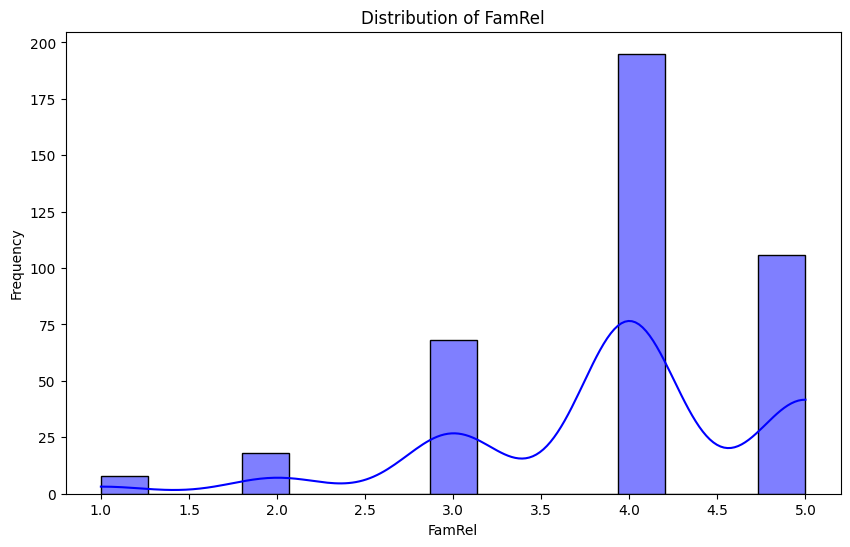

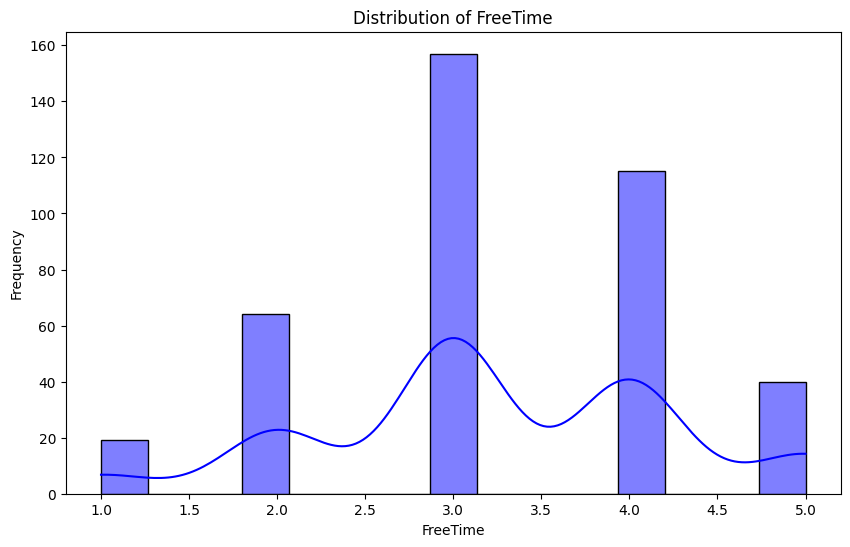

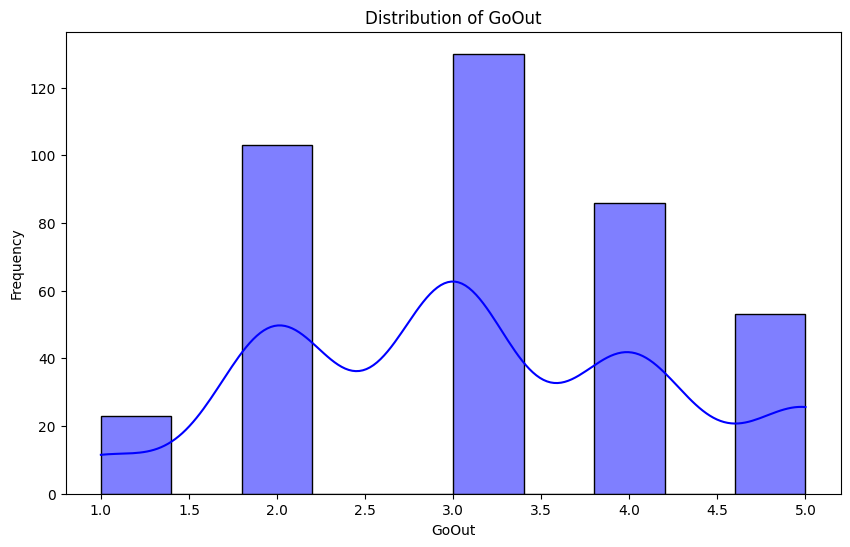

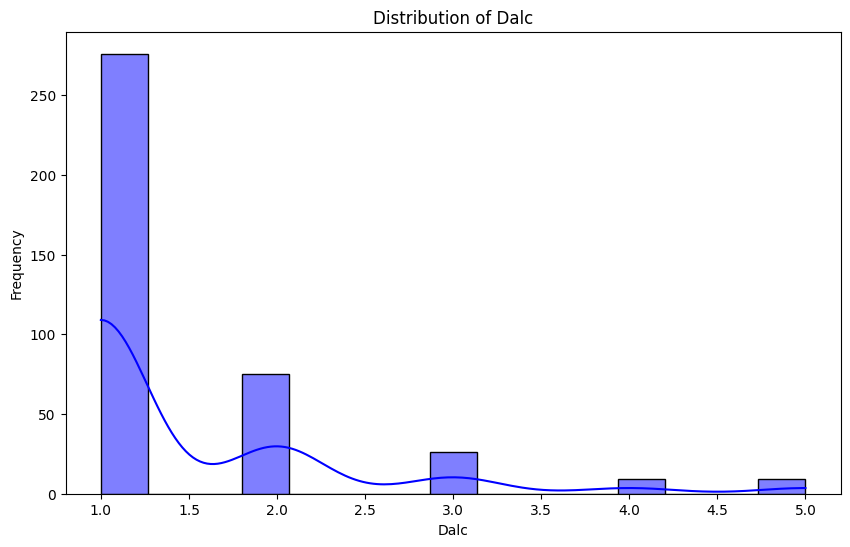

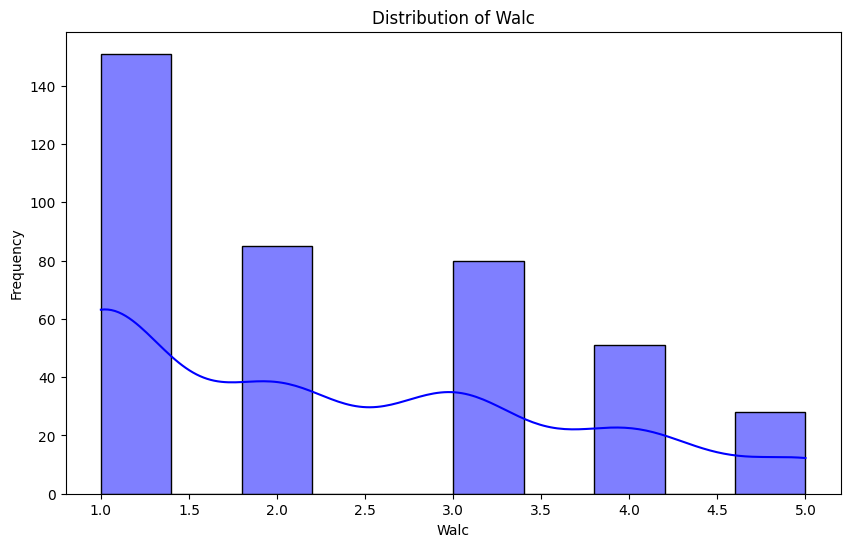

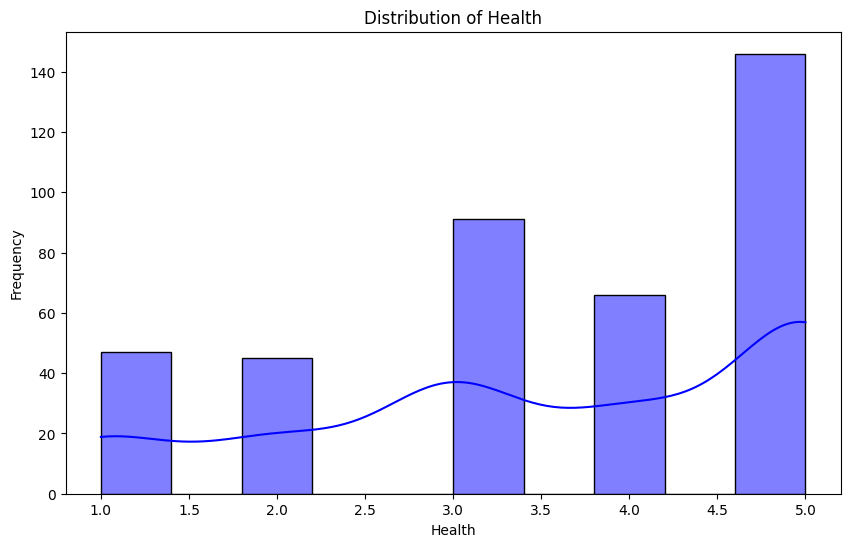

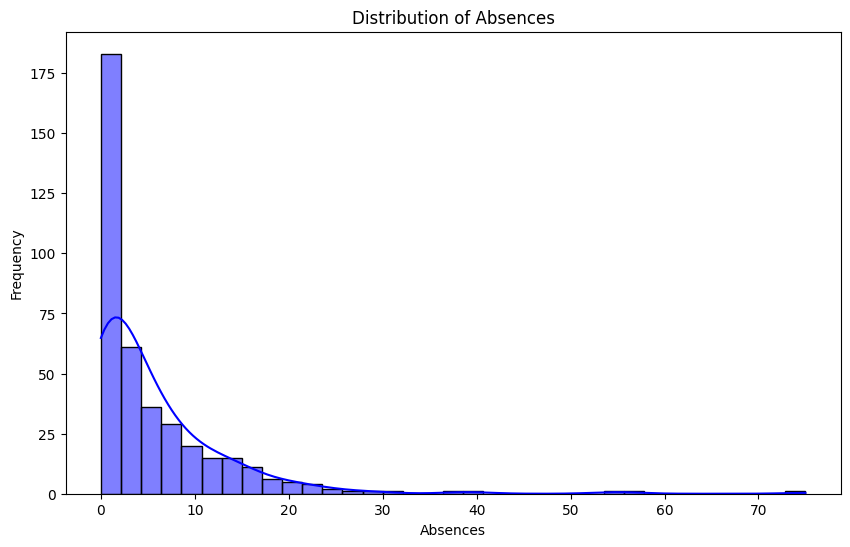

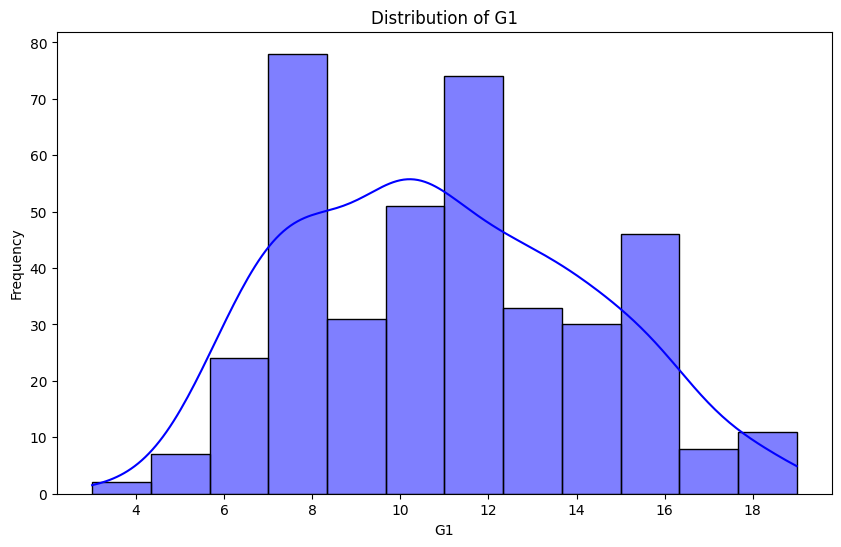

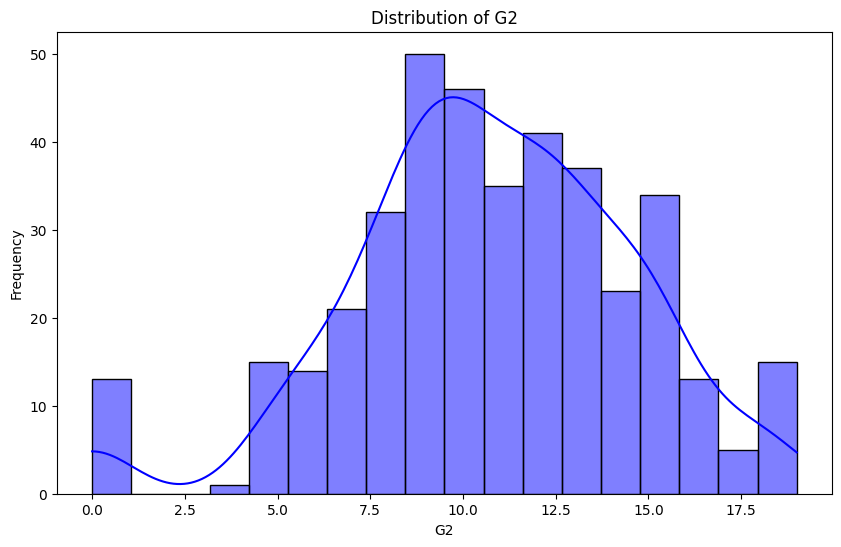

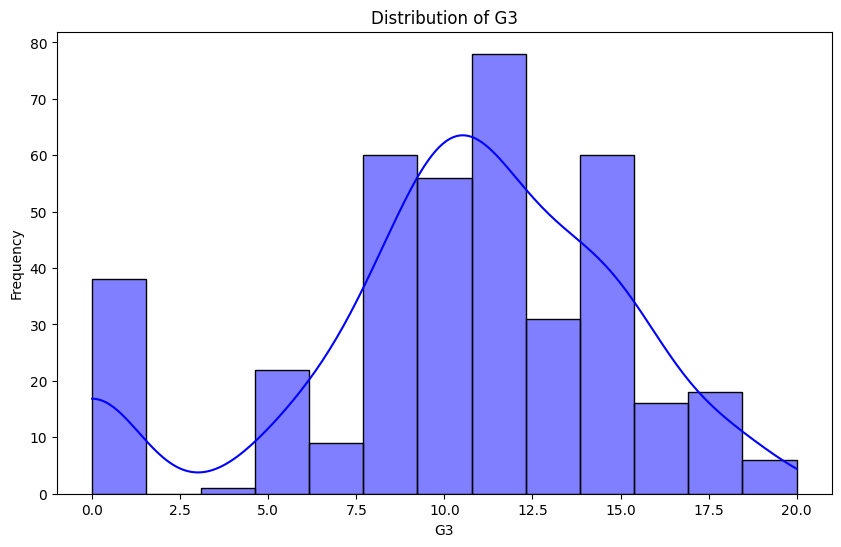

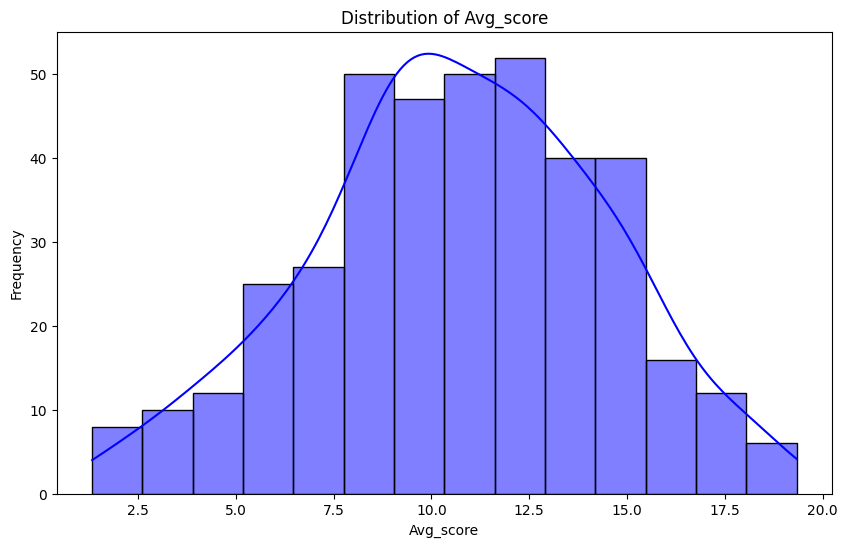

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


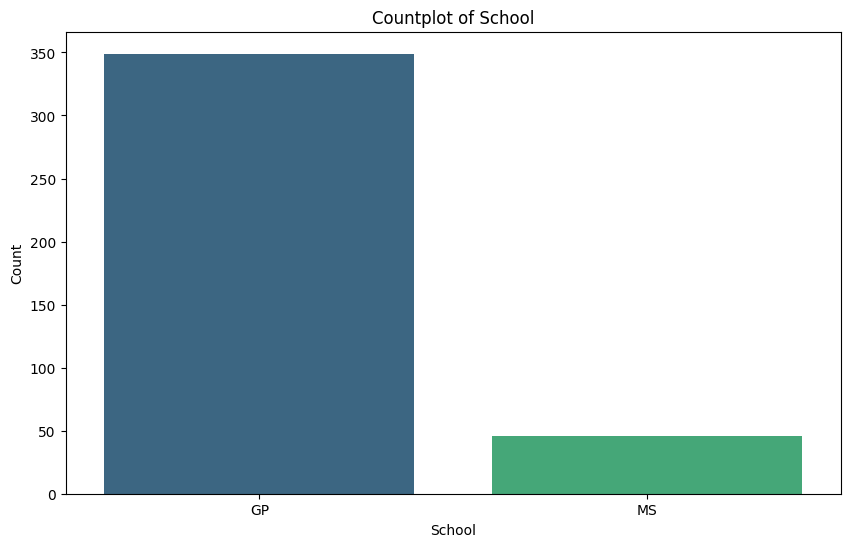

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


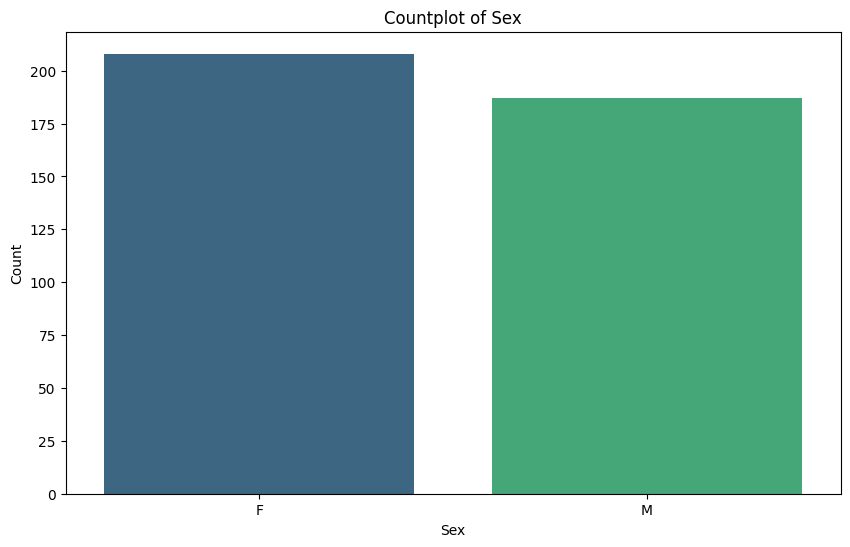

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


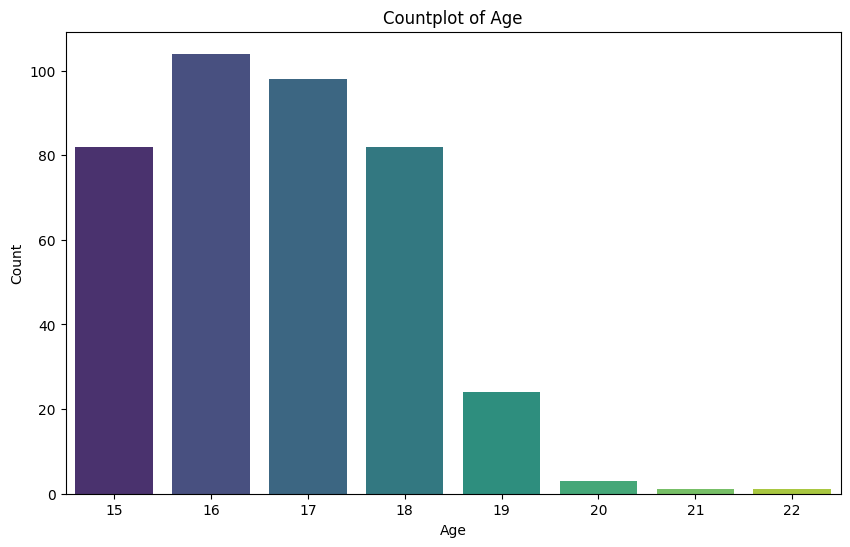

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


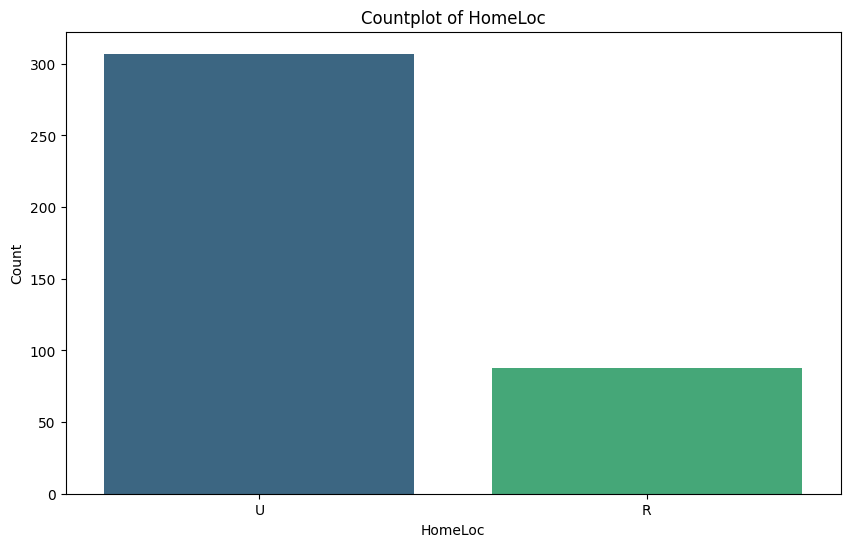

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


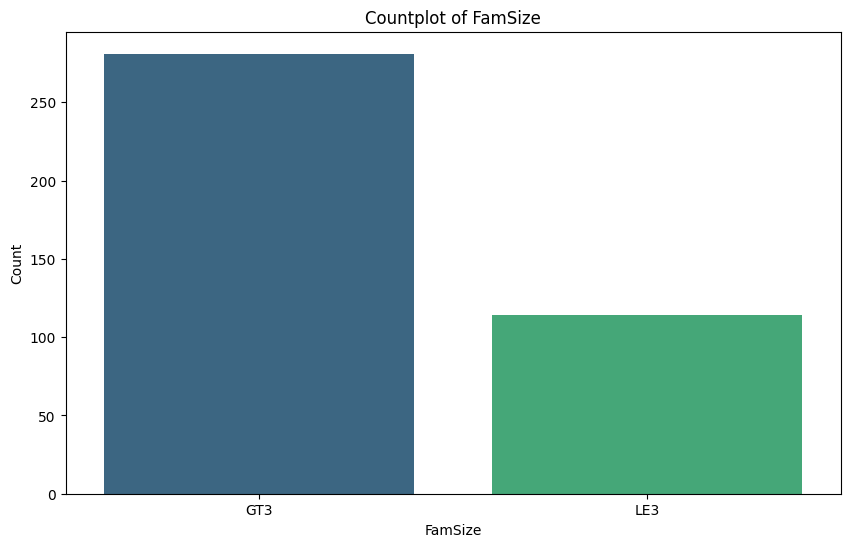

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


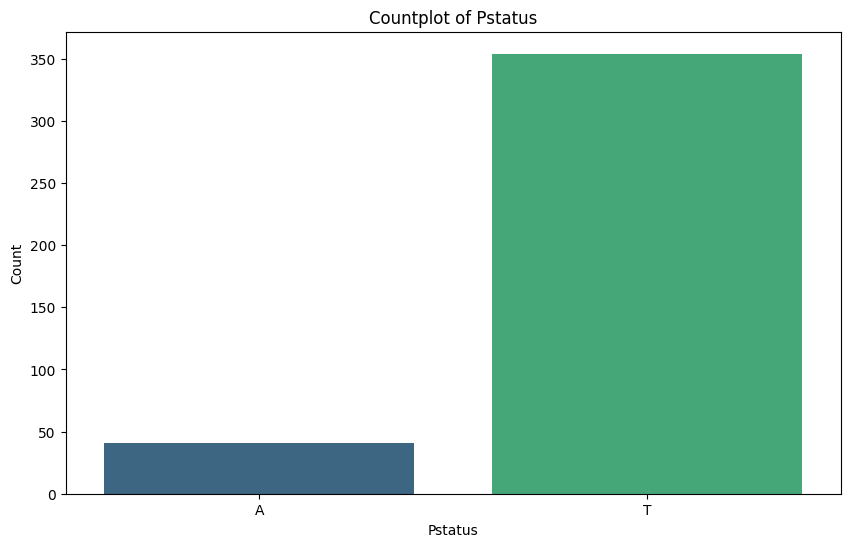

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


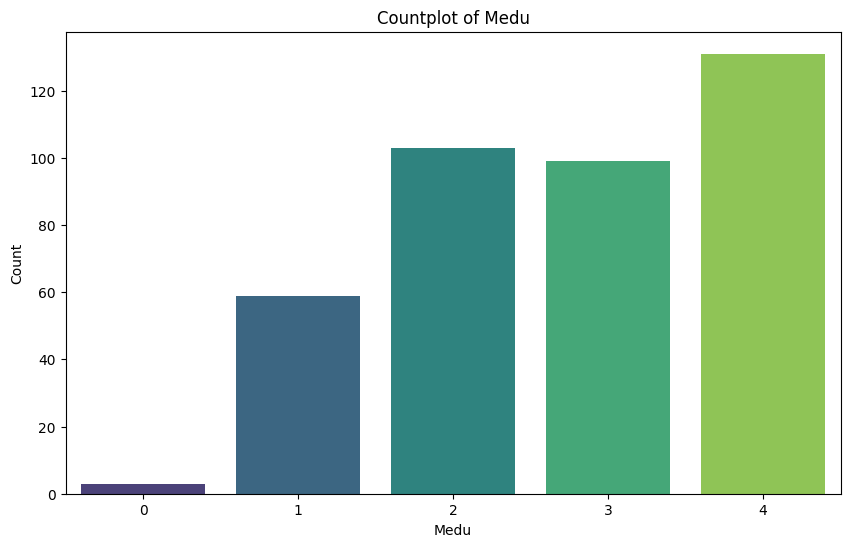

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


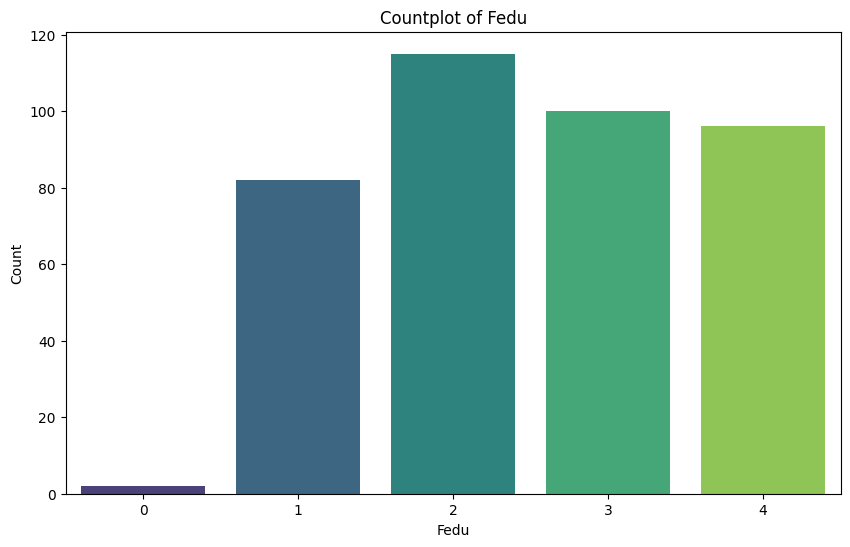

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


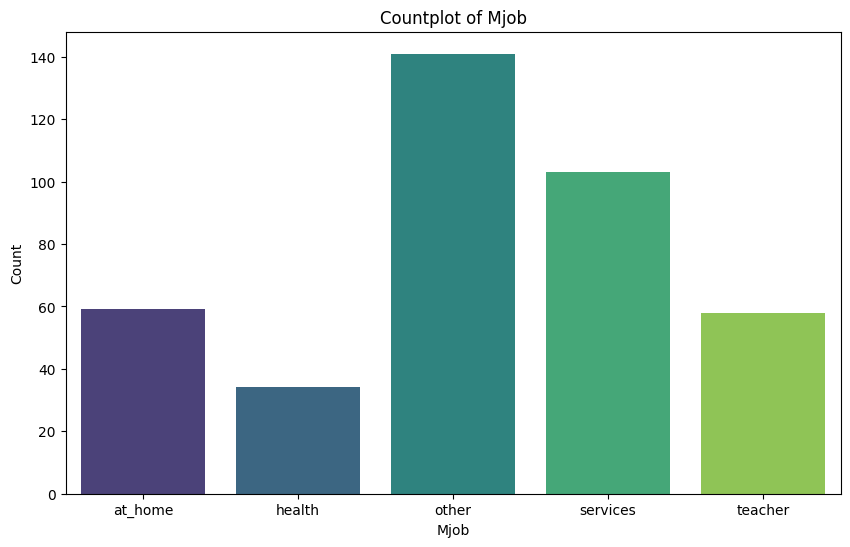

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


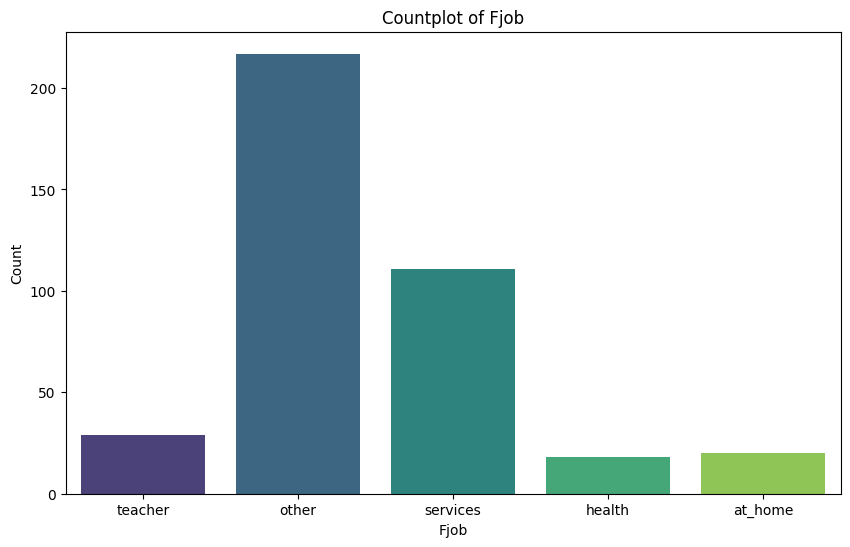

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


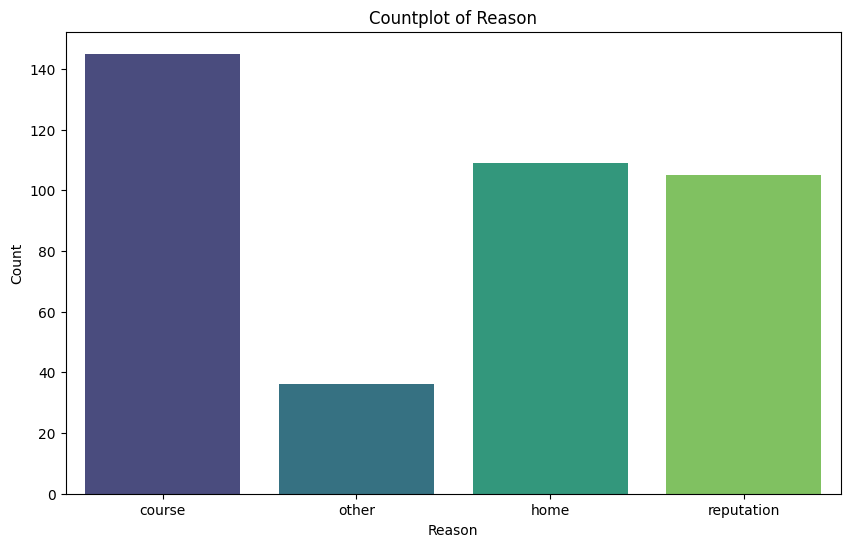

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


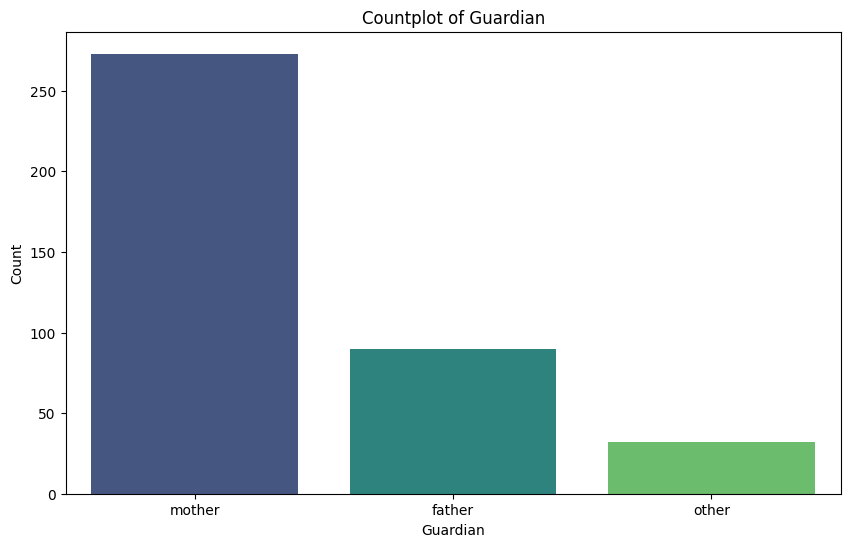

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


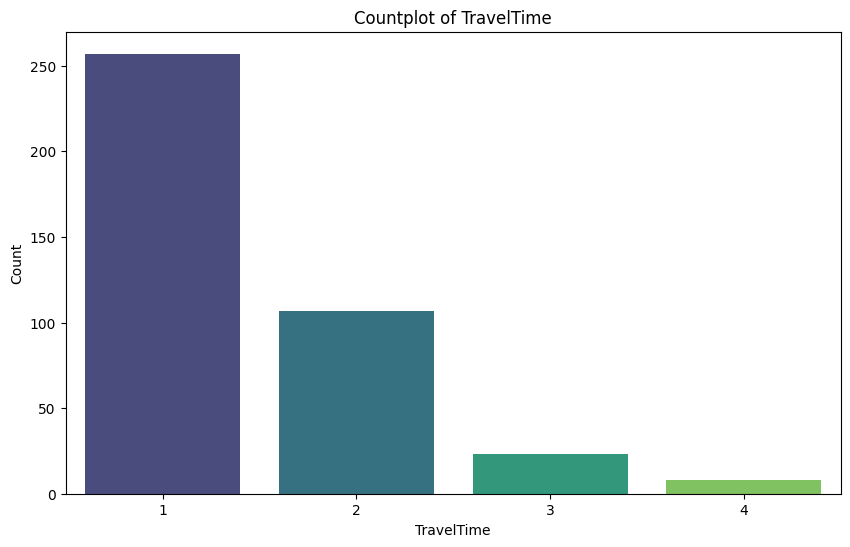

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


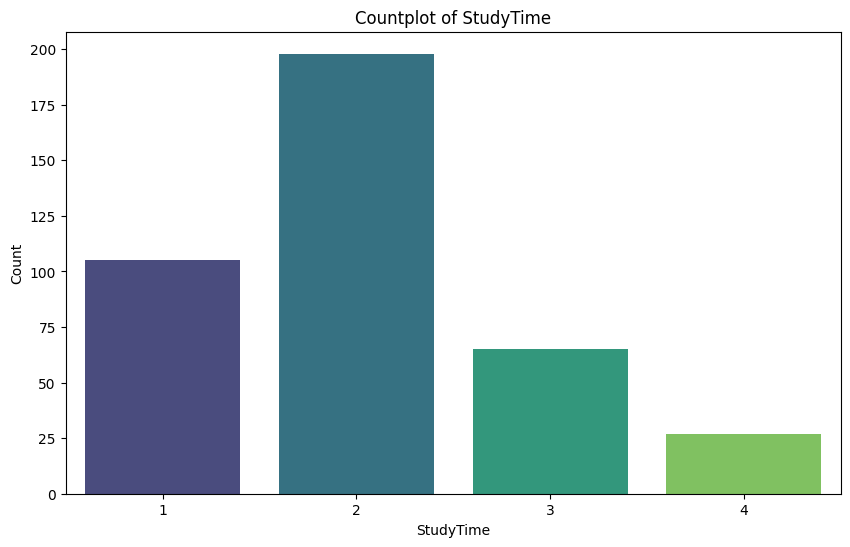

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


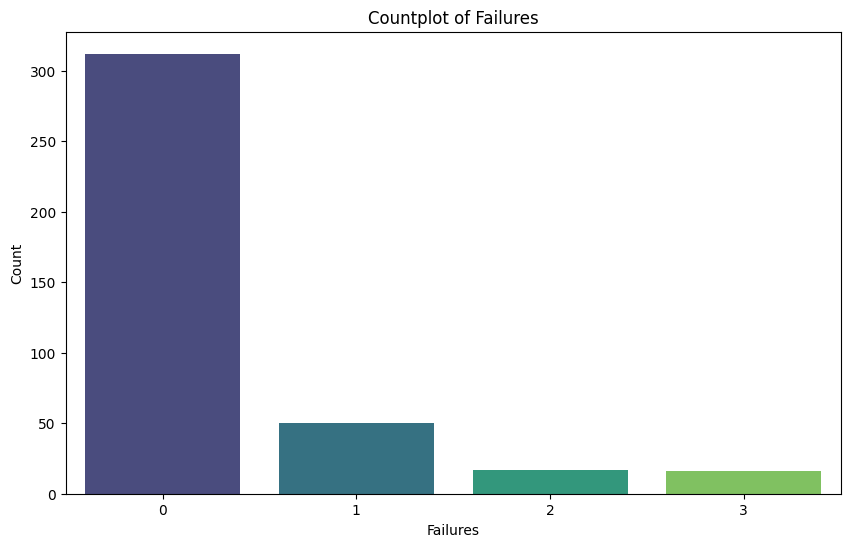

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


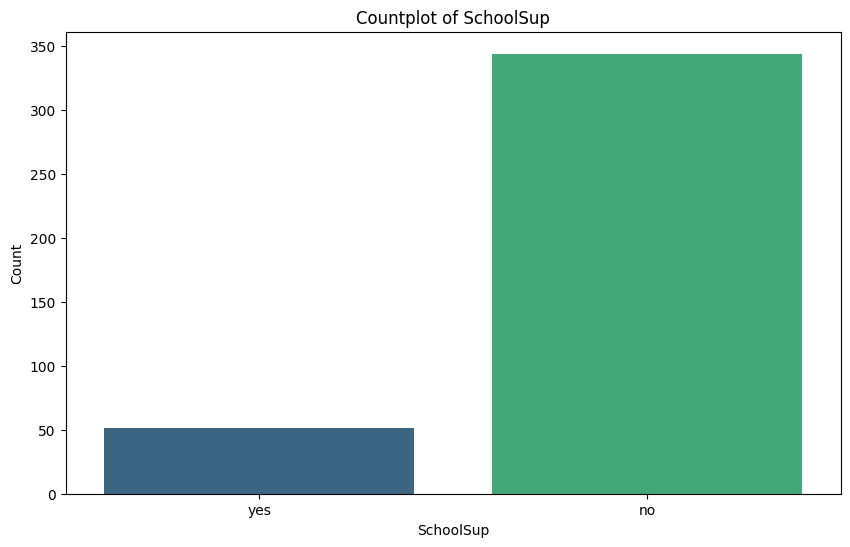

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


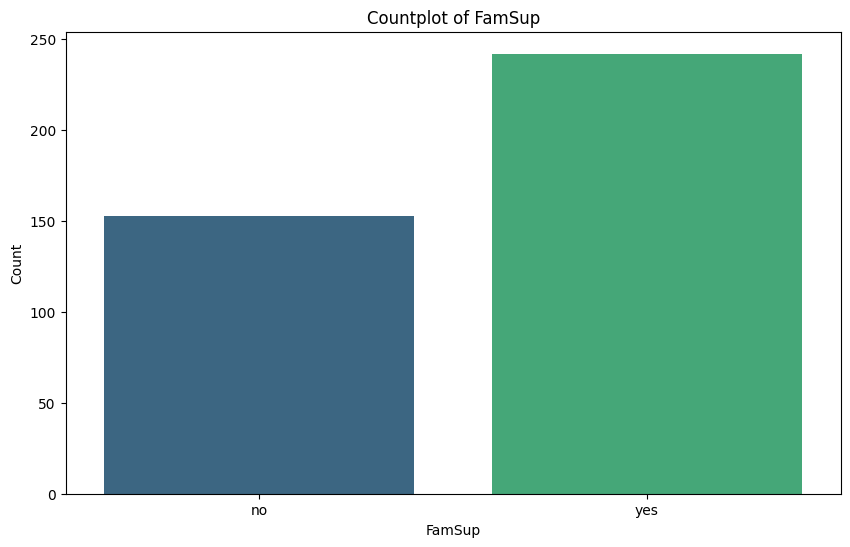

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


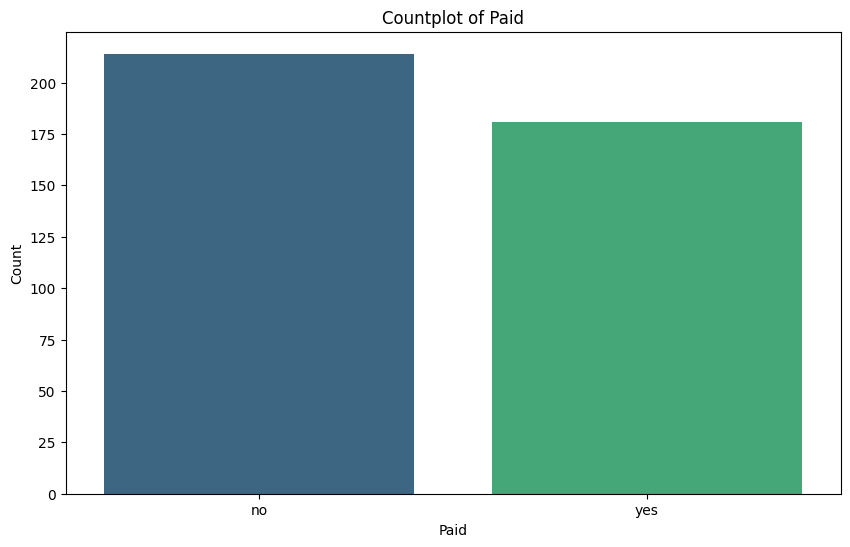

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


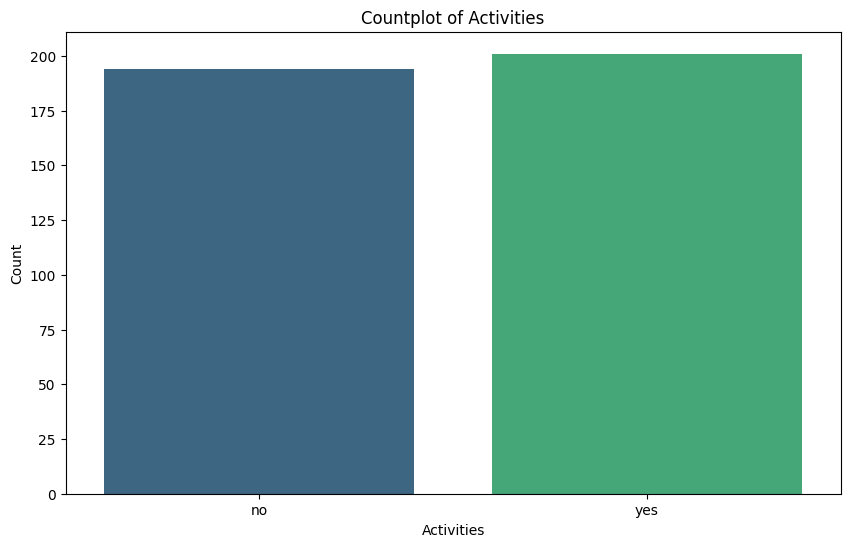

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


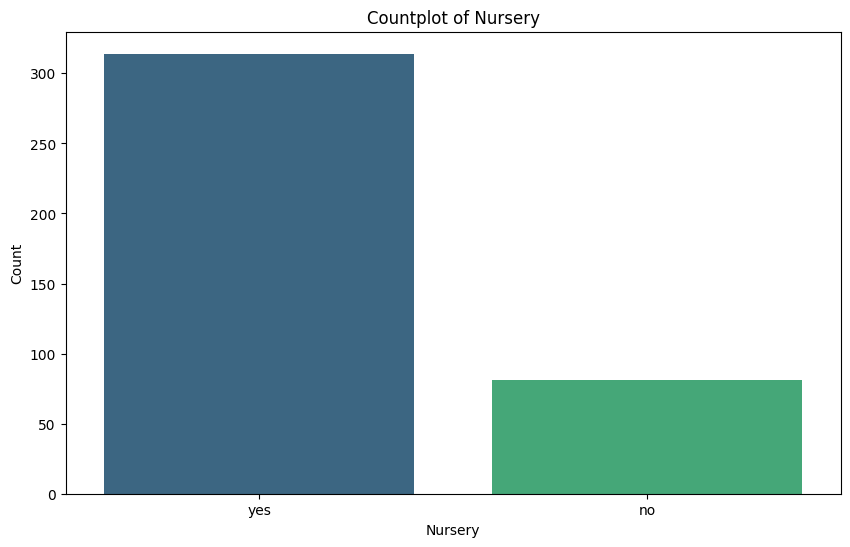

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


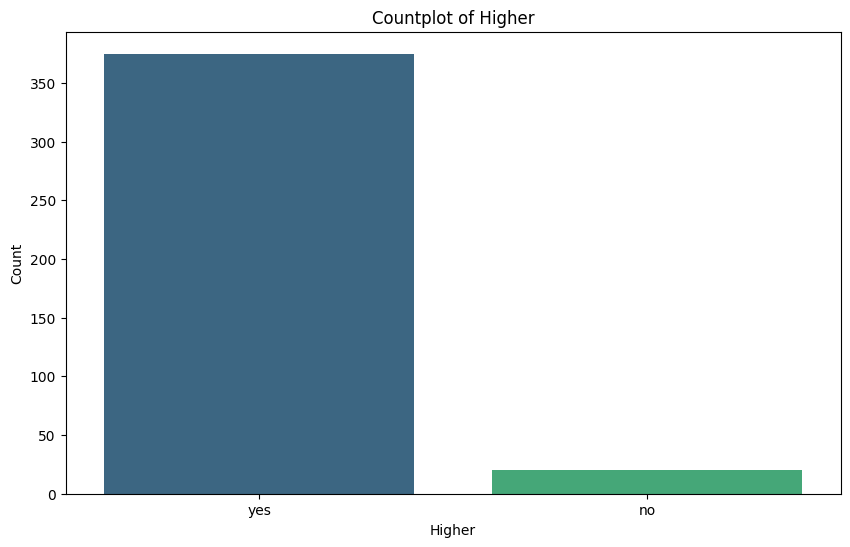

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


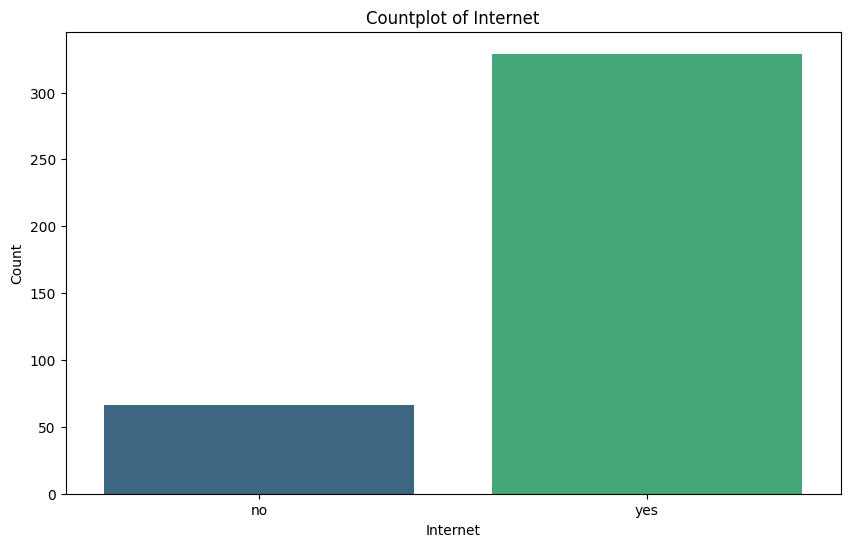

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


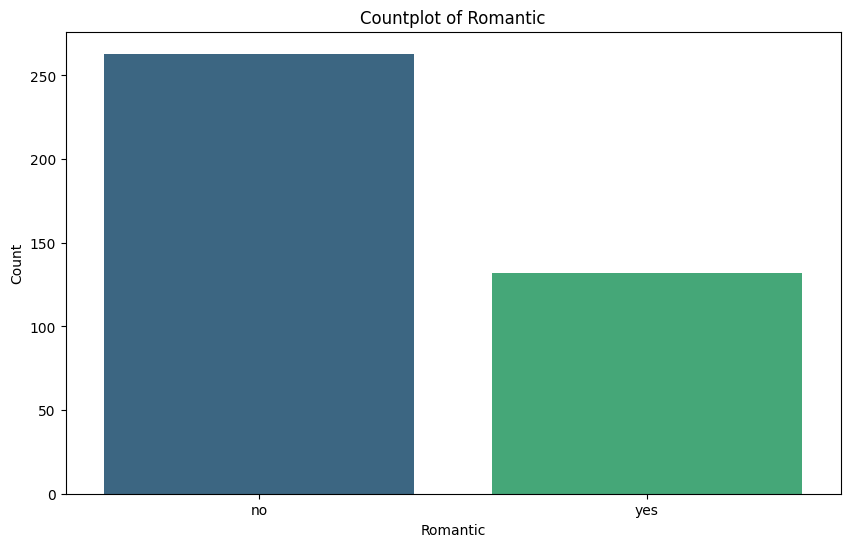

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


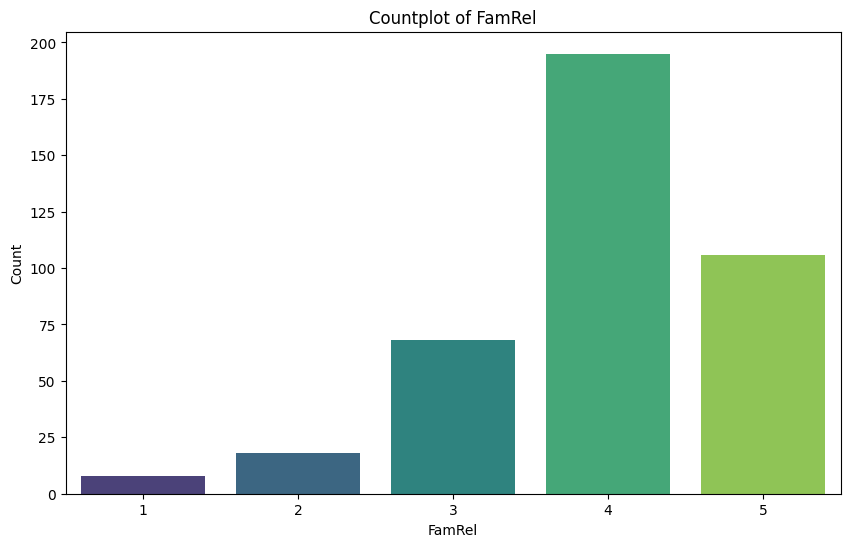

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


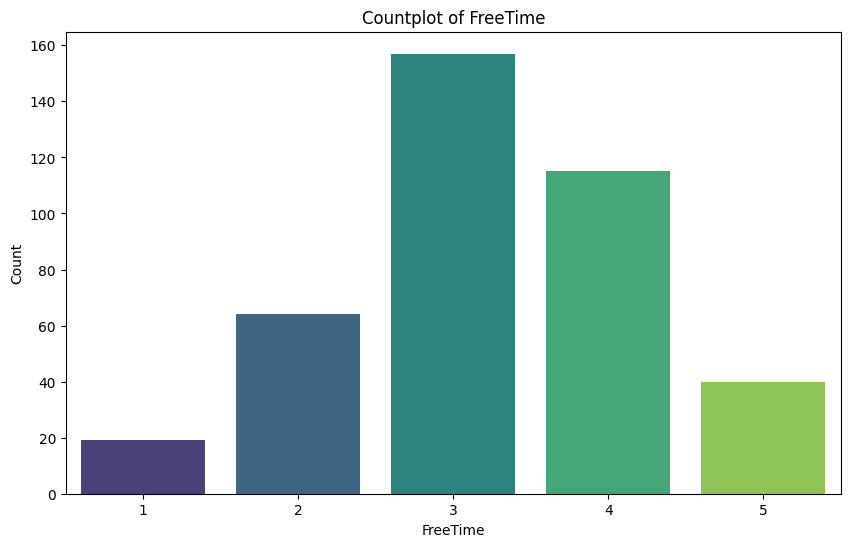

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


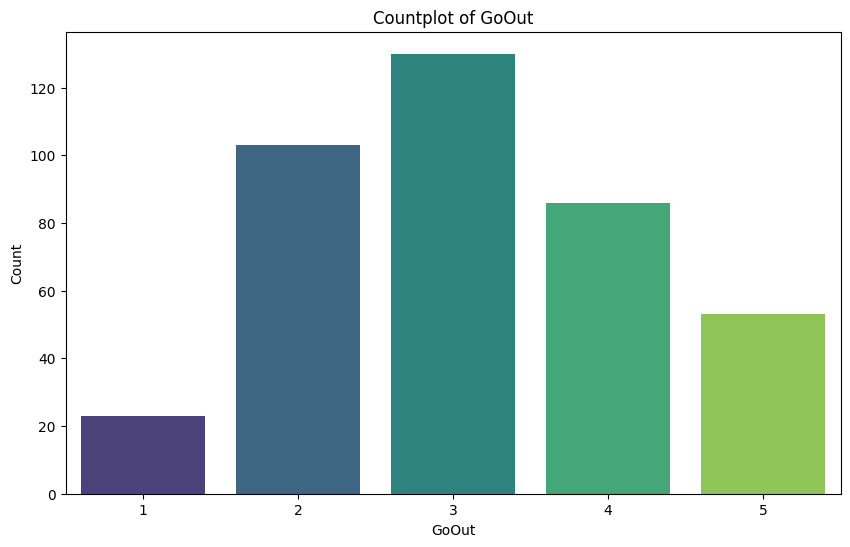

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


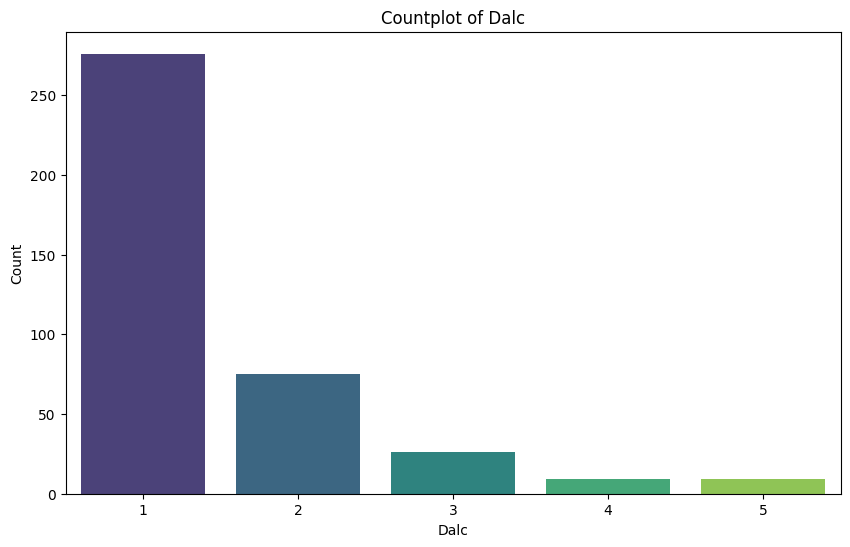

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


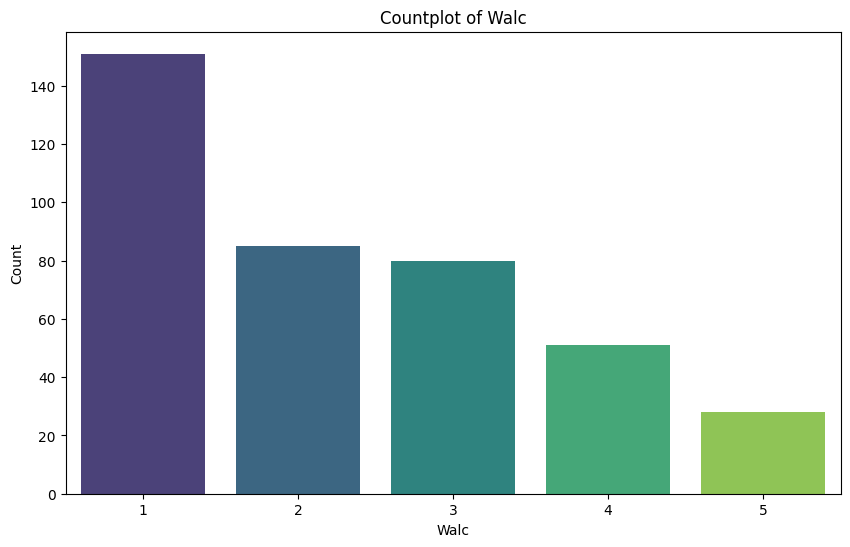

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


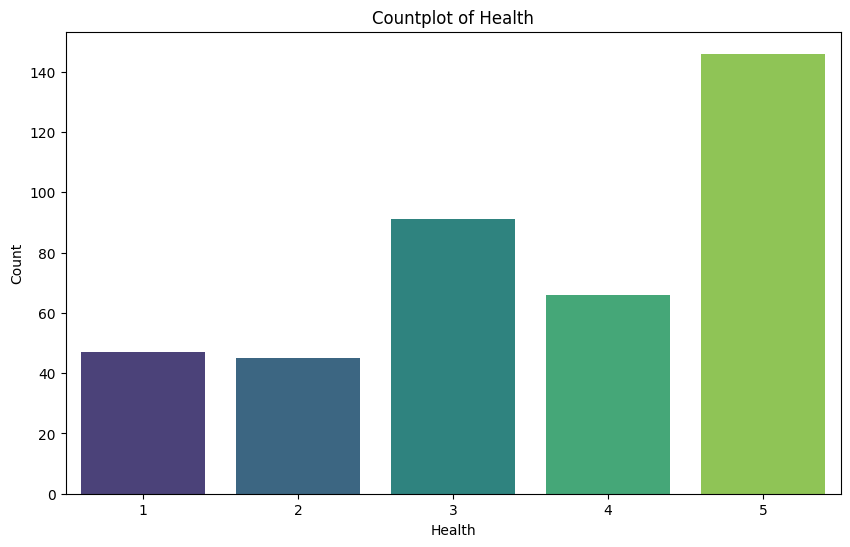

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


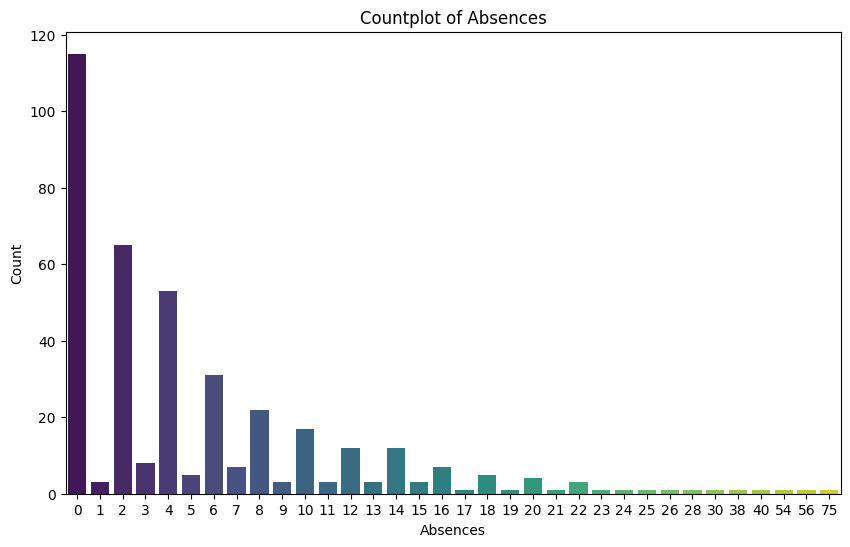

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


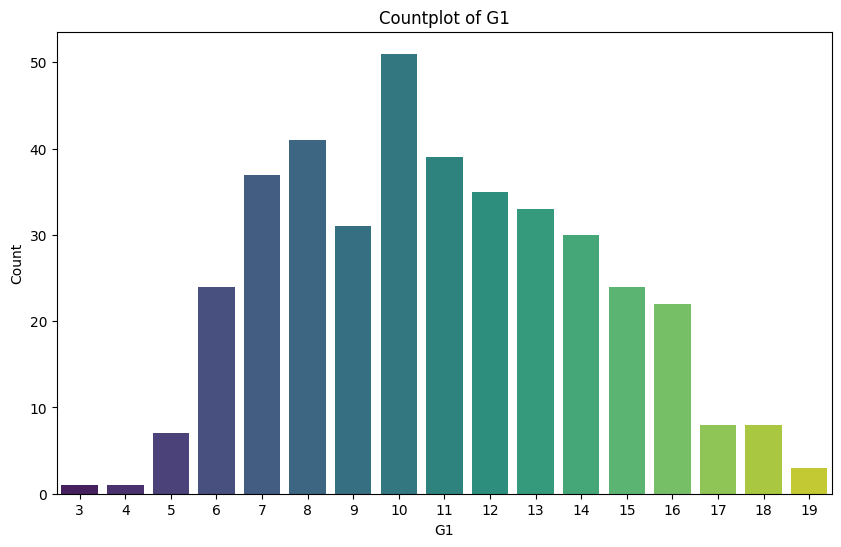

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


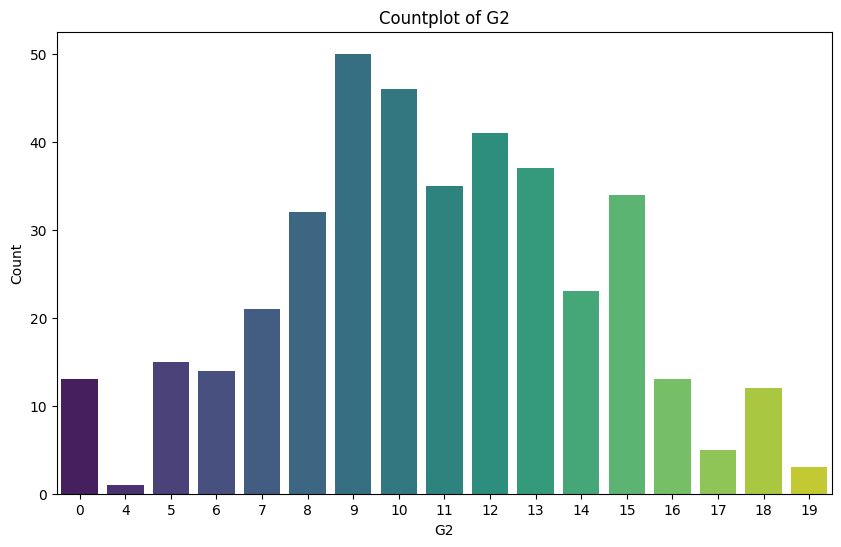

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


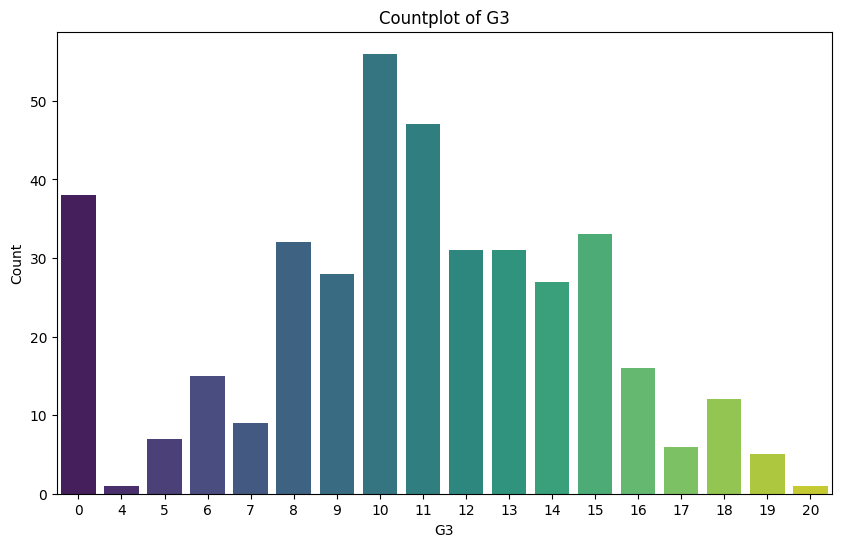

In [103]:
if __name__ == '__main__':
    # Plot distributions of numerical features
    plot_distributions(data)
    


In [104]:
# Convert non-numeric features to numeric
non_numeric_features = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for feature in non_numeric_features:
    data[feature] = label_encoder.fit_transform(data[feature])


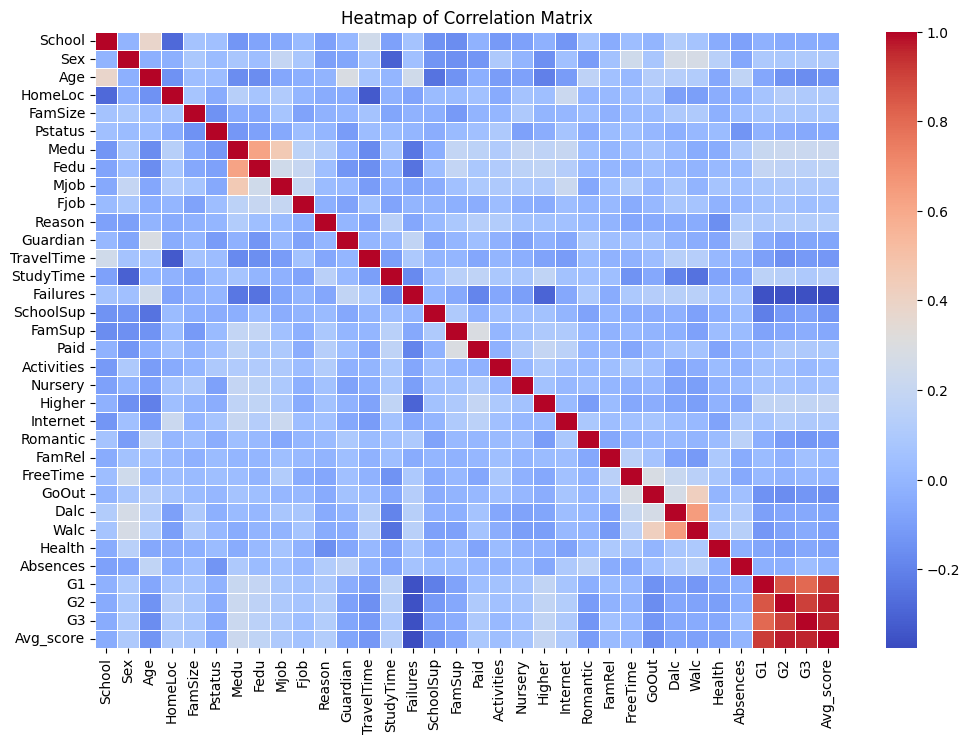

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_13032\2943331872.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_sorted, y=feature_importances_sorted.index, palette='viridis')


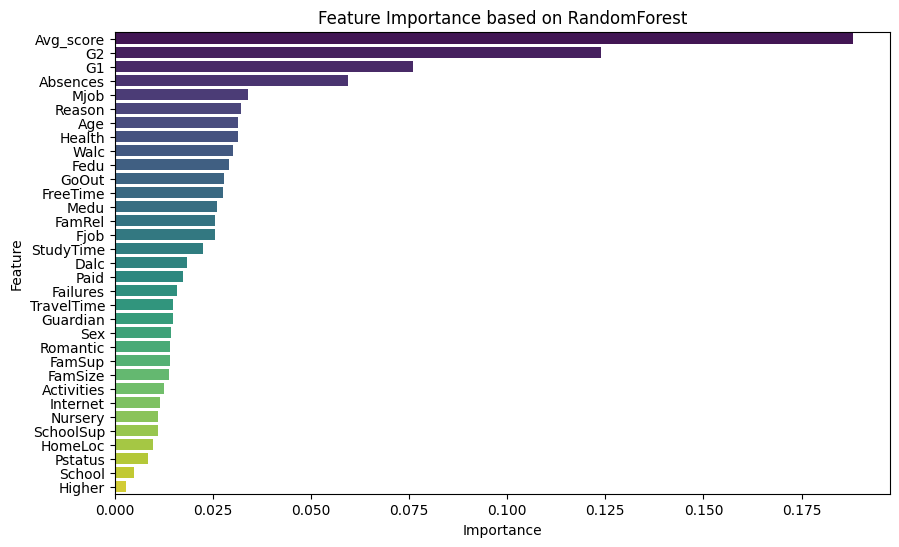

In [105]:
# Plot heatmap of correlation matrix
plot_heatmap(data)

# Plot feature importance
# Assuming the target column is named 'target' - replace with actual target column name
plot_feature_importance(data, target_column='G3')


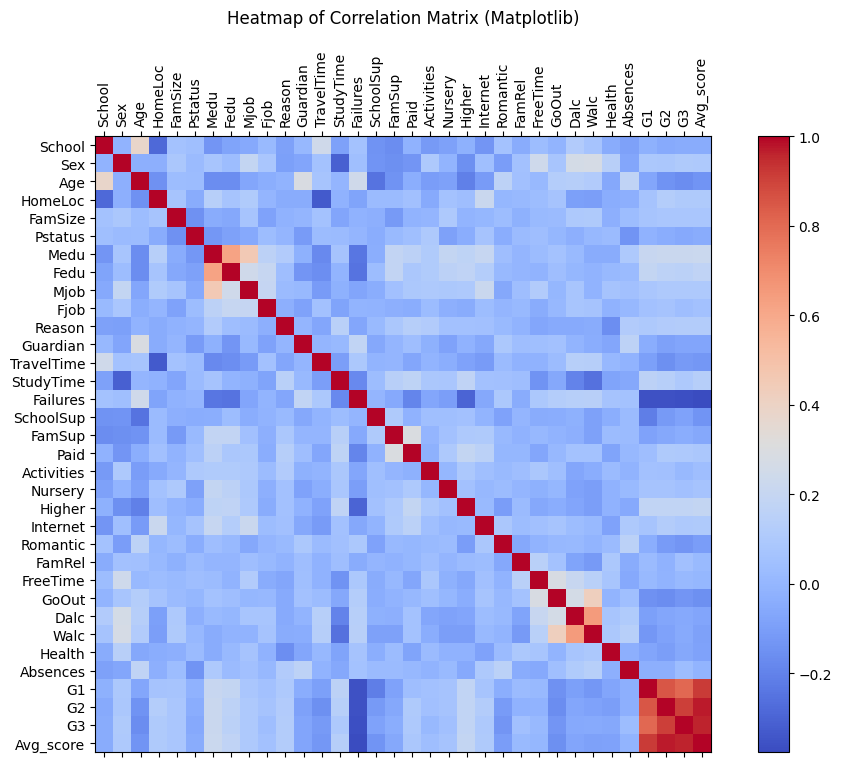

In [106]:
# Plot heatmap of correlation matrix using matplotlib
plot_heatmap_matplotlib(data)
    
